In [16]:
!pip install vaderSentiment

In [24]:
from matplotlib import font_manager, rc

# 한글 폰트 설정 (Windows에서는 기본적으로 'Malgun Gothic'을 사용)
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows 경로
font_prop = font_manager.FontProperties(fname=font_path)
rc('font', family=font_prop.get_name())

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGU

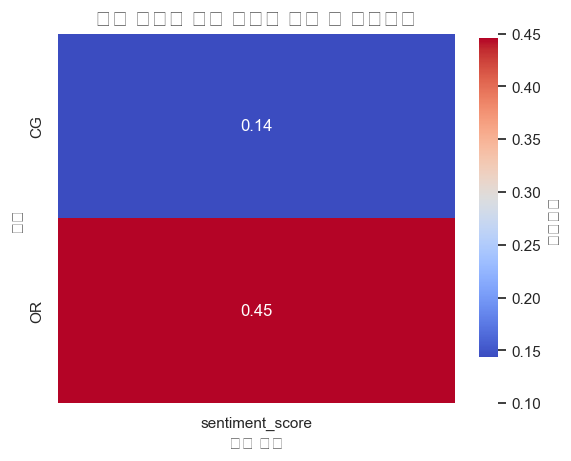

In [25]:
# 상관관계 시각화 (히트맵)
corr_matrix = df.groupby('label')[['sentiment_score', 'rating']].corr().iloc[0::2, -1].unstack()

# 상관관계 시각화 (히트맵)
sns.set(style="white")  # 배경 스타일 설정
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
# 범례 색상 반전
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks(colorbar.get_ticks()[::-1])  # 범례의 ticks 반전
colorbar.set_label('상관관계', fontsize=12)  # 범례 라벨 설정

# 한글 제목 및 축 레이블 설정
plt.title('리뷰 유형별 감성 점수와 평점 간 상관관계', fontsize=16)
plt.xlabel('감성 점수', fontsize=12)
plt.ylabel('평점', fontsize=12)

plt.show()

0        0.9592
1        0.8910
2        0.7906
3        0.7463
4        0.7397
          ...  
40427    0.9943
40428    0.9988
40429    0.6892
40430    0.9988
40431    0.9695
Name: sentiment_score, Length: 40432, dtype: float64
AI 리뷰 감성 점수와 평점 간 상관관계: 0.1433
인간 리뷰 감성 점수와 평점 간 상관관계: 0.4459


C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGU

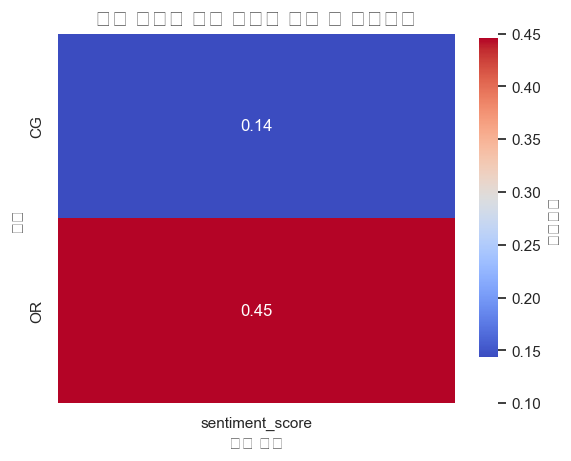

In [23]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# CSV 파일 불러오기 (파일 경로를 지정해 주세요)
df = pd.read_csv('fake_reviews_dataset.csv')

# 감성 분석을 위한 VADER SentimentIntensityAnalyzer 객체 생성
analyzer = SentimentIntensityAnalyzer()

# 'text_' 컬럼에 대해 감성 분석 실행
df['sentiment_score'] = df['text_'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

print(df['sentiment_score'])
# AI와 인간 리뷰로 분류
df_ai = df[df['label'] == 'CG']
df_human = df[df['label'] == 'OR']

# AI 리뷰와 평점 간 상관관계
ai_corr, _ = pearsonr(df_ai['sentiment_score'], df_ai['rating'])
print(f"AI 리뷰 감성 점수와 평점 간 상관관계: {ai_corr:.4f}")

# 인간 리뷰와 평점 간 상관관계
human_corr, _ = pearsonr(df_human['sentiment_score'], df_human['rating'])
print(f"인간 리뷰 감성 점수와 평점 간 상관관계: {human_corr:.4f}")

# 상관관계 시각화 (히트맵)
corr_matrix = df.groupby('label')[['sentiment_score', 'rating']].corr().iloc[0::2, -1].unstack()

# 상관관계 시각화 (히트맵)
sns.set(style="white")  # 배경 스타일 설정
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
# 범례 색상 반전
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks(colorbar.get_ticks()[::-1])  # 범례의 ticks 반전
colorbar.set_label('상관관계', fontsize=12)  # 범례 라벨 설정

# 한글 제목 및 축 레이블 설정
plt.title('리뷰 유형별 감성 점수와 평점 간 상관관계', fontsize=16)
plt.xlabel('감성 점수', fontsize=12)
plt.ylabel('평점', fontsize=12)

plt.show()


In [19]:
!pip install textblob

AI 리뷰 감성 점수와 평점 간 상관관계: 0.1743
인간 리뷰 감성 점수와 평점 간 상관관계: 0.3789


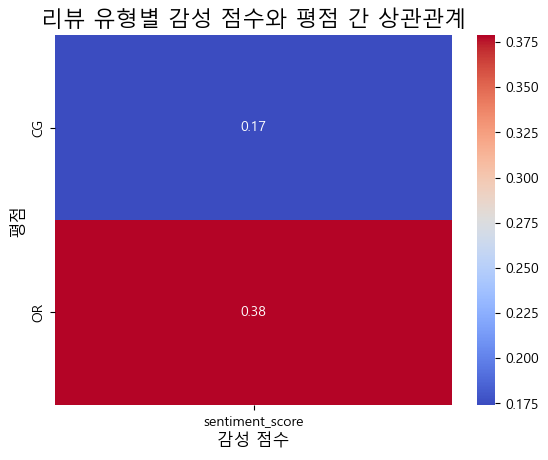

In [20]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# CSV 파일 불러오기 (파일 경로를 지정해 주세요)
df = pd.read_csv('fake_reviews_dataset.csv')

# 감성 분석을 위한 TextBlob 객체를 사용하여 'polarity' 값을 구함
df['sentiment_score'] = df['text_'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# AI와 인간 리뷰로 분류
df_ai = df[df['label'] == 'CG']
df_human = df[df['label'] == 'OR']

# AI 리뷰와 평점 간 상관관계
ai_corr, _ = pearsonr(df_ai['sentiment_score'], df_ai['rating'])
print(f"AI 리뷰 감성 점수와 평점 간 상관관계: {ai_corr:.4f}")

# 인간 리뷰와 평점 간 상관관계
human_corr, _ = pearsonr(df_human['sentiment_score'], df_human['rating'])
print(f"인간 리뷰 감성 점수와 평점 간 상관관계: {human_corr:.4f}")

# 상관관계 시각화 (히트맵)
corr_matrix = df.groupby('label')[['sentiment_score', 'rating']].corr().iloc[0::2, -1].unstack()

# 상관관계 시각화 (히트맵)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('리뷰 유형별 감성 점수와 평점 간 상관관계', fontsize=16)  # 한글 제목
plt.xlabel('감성 점수', fontsize=12)  # 한글 x축 레이블
plt.ylabel('평점', fontsize=12)  # 한글 y축 레이블
plt.show()


AI 리뷰 감성 점수와 평점 간 상관관계: 0.1366
인간 리뷰 감성 점수와 평점 간 상관관계: 0.3196


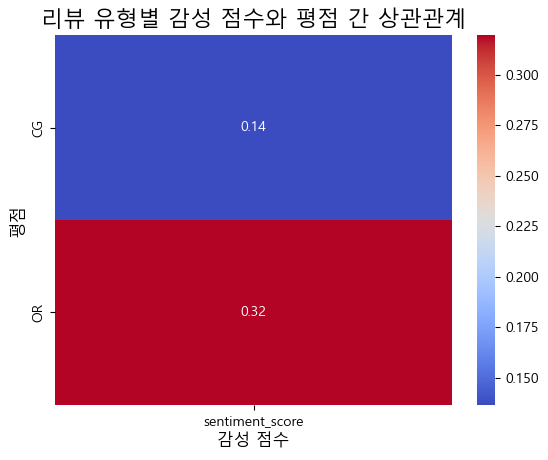

In [21]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# CSV 파일 불러오기 (파일 경로를 지정해 주세요)
df = pd.read_csv('fake_reviews_dataset.csv')

# 평점 값이 3이하인 것만
df = df[df['rating'] <= 3]
df

# 감성 분석을 위한 VADER SentimentIntensityAnalyzer 객체 생성
analyzer = SentimentIntensityAnalyzer()

# 'text_' 컬럼에 대해 감성 분석 실행
df['sentiment_score'] = df['text_'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# AI와 인간 리뷰로 분류
df_ai = df[df['label'] == 'CG']
df_human = df[df['label'] == 'OR']

# AI 리뷰와 평점 간 상관관계
ai_corr, _ = pearsonr(df_ai['sentiment_score'], df_ai['rating'])
print(f"AI 리뷰 감성 점수와 평점 간 상관관계: {ai_corr:.4f}")

# 인간 리뷰와 평점 간 상관관계
human_corr, _ = pearsonr(df_human['sentiment_score'], df_human['rating'])
print(f"인간 리뷰 감성 점수와 평점 간 상관관계: {human_corr:.4f}")

# 상관관계 시각화 (히트맵)
corr_matrix = df.groupby('label')[['sentiment_score', 'rating']].corr().iloc[0::2, -1].unstack()

# 상관관계 시각화 (히트맵)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('리뷰 유형별 감성 점수와 평점 간 상관관계', fontsize=16)  # 한글 제목
plt.xlabel('감성 점수', fontsize=12)  # 한글 x축 레이블
plt.ylabel('평점', fontsize=12)  # 한글 y축 레이블
plt.show()


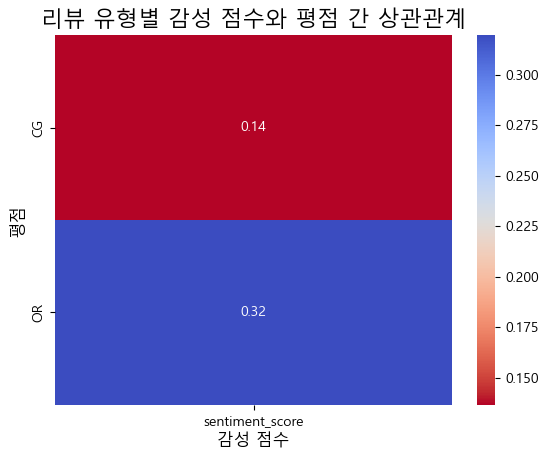

In [22]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', cbar=True)
plt.title('리뷰 유형별 감성 점수와 평점 간 상관관계', fontsize=16)  # 한글 제목
plt.xlabel('감성 점수', fontsize=12)  # 한글 x축 레이블
plt.ylabel('평점', fontsize=12)  # 한글 y축 레이블
plt.show()